In [1]:
import h5py
import pandas as pd
import numpy as np

In [2]:
import sunpy
from sunpy.map import Map

/Users/ainglis/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/ainglis/python/sunpy/sunpy/visualization/wcsaxes_compat.py:17: UserWarning: SunPy plotting is improved by installing the WCSAxes module: http://wcsaxes.readthedocs.org/en/latest/index.html
  warnings.warn("SunPy plotting is improved by installing the WCSAxes module: http://wcsaxes.readthedocs.org/en/latest/index.html")


In [3]:
h = h5py.File('foxsi2.hdf5')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
for i, col in enumerate(h['level2/detector0']):
    if i == 0:
        det0 = pd.DataFrame(data=h['level2/detector0'][col][:], columns=[col])
    else:
        data = h['level2/detector0'][col][:]
        if len(data.shape) == 1:
            det0[col] = pd.DataFrame(data=data)
        else:
            det0[col+'_x'] = pd.DataFrame(data=data[:,0])
            det0[col+'_y'] = pd.DataFrame(data=data[:,1])
            
for i, col in enumerate(h['level2/detector1']):
    if i == 0:
        det1 = pd.DataFrame(data=h['level2/detector1'][col][:], columns=[col])
    else:
        data = h['level2/detector1'][col][:]
        if len(data.shape) == 1:
            det1[col] = pd.DataFrame(data=data)
        else:
            det1[col+'_x'] = pd.DataFrame(data=data[:,0])
            det1[col+'_y'] = pd.DataFrame(data=data[:,1])
            
for i, col in enumerate(h['level2/detector2']):
    if i == 0:
        det2 = pd.DataFrame(data=h['level2/detector2'][col][:], columns=[col])
    else:
        data = h['level2/detector2'][col][:]
        if len(data.shape) == 1:
            det2[col] = pd.DataFrame(data=data)
        else:
            det2[col+'_x'] = pd.DataFrame(data=data[:,0])
            det2[col+'_y'] = pd.DataFrame(data=data[:,1])
            
            
for i, col in enumerate(h['level2/detector3']):
    if i == 0:
        det3 = pd.DataFrame(data=h['level2/detector3'][col][:], columns=[col])
    else:
        data = h['level2/detector3'][col][:]
        if len(data.shape) == 1:
            det3[col] = pd.DataFrame(data=data)
        else:
            det3[col+'_x'] = pd.DataFrame(data=data[:,0])
            det3[col+'_y'] = pd.DataFrame(data=data[:,1])
            
            
for i, col in enumerate(h['level2/detector4']):
    if i == 0:
        det4 = pd.DataFrame(data=h['level2/detector4'][col][:], columns=[col])
    else:
        data = h['level2/detector4'][col][:]
        if len(data.shape) == 1:
            det4[col] = pd.DataFrame(data=data)
        else:
            det4[col+'_x'] = pd.DataFrame(data=data[:,0])
            det4[col+'_y'] = pd.DataFrame(data=data[:,1])
            
            
for i, col in enumerate(h['level2/detector5']):
    if i == 0:
        det5 = pd.DataFrame(data=h['level2/detector5'][col][:], columns=[col])
    else:
        data = h['level2/detector5'][col][:]
        if len(data.shape) == 1:
            det5[col] = pd.DataFrame(data=data)
        else:
            det5[col+'_x'] = pd.DataFrame(data=data[:,0])
            det5[col+'_y'] = pd.DataFrame(data=data[:,1])
            
for i, col in enumerate(h['level2/detector6']):
    if i == 0:
        det6 = pd.DataFrame(data=h['level2/detector6'][col][:], columns=[col])
    else:
        data = h['level2/detector6'][col][:]
        if len(data.shape) == 1:
            det6[col] = pd.DataFrame(data=data)
        else:
            det6[col+'_x'] = pd.DataFrame(data=data[:,0])
            det6[col+'_y'] = pd.DataFrame(data=data[:,1])

In [6]:
det0_good = det0.query('error_flag == 0')
det1_good = det1.query('error_flag == 0')
det2_good = det2.query('error_flag == 0')
det3_good = det3.query('error_flag == 0')
det4_good = det4.query('error_flag == 0')
det5_good = det5.query('error_flag == 0')
det6_good = det6.query('error_flag == 0')

(-500.0, -200.0, -200.0, 100.0)

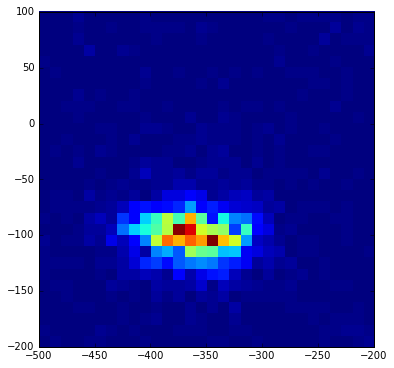

In [162]:
plt.figure(1,figsize=(6,6))
h=plt.hist2d(det6_good['hit_xy_solar_x'],det6_good['hit_xy_solar_y'],bins=[np.linspace(-500,-200,31),np.linspace(-200,100,31)])
plt.axis('equal')



In [7]:
#estimate microflare centers for each detector
det0_center = [-370,-120]
det1_center = [-350,-120]
det4_center = [-360,-75]
det5_center = [-380,-90]
det6_center = [-365,-100]


In [8]:
#use RHESSI as a pointing guide.
import sunpy
import sunpy.map

In [9]:
hsimap = sunpy.map.Map('/Users/ainglis/physics/foxsi_2014/iris_foxsi_data/hsi_image_20141211_191200.fits')

In [10]:
import scipy.ndimage
import astropy.units as u

In [11]:
r = scipy.ndimage.measurements.center_of_mass(hsimap.data)
coords=hsimap.pixel_to_data(np.linspace(0,63,64)*u.pix,np.linspace(0,63,64)*u.pix)
#coords_x = coords[0].value
#coords_y = coords[1].value
coords_x = np.linspace(0,63,64)
coords_y = np.linspace(0,63,64)

total_for_each_column = np.sum(hsimap.data,1) + 1.0

total_for_each_row = np.sum(hsimap.data,0) + 1.0


/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  passing values from FITS header or map attributes.
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  passing values from FITS header or map attributes.
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  


In [12]:

cgx = np.sum(coords_x*total_for_each_column)/np.sum(total_for_each_column)
cgy = np.sum(coords_y*total_for_each_row)/np.sum(total_for_each_row)

print [cgx,cgy]
cgx_arcsec,cgy_arcsec = hsimap.pixel_to_data(cgx*u.pix,cgy*u.pix)


[31.412787151158611, 31.388073350472162]


/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  passing values from FITS header or map attributes.
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  passing values from FITS header or map attributes.
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  


/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  passing values from FITS header or map attributes.
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  


(-300, -150)

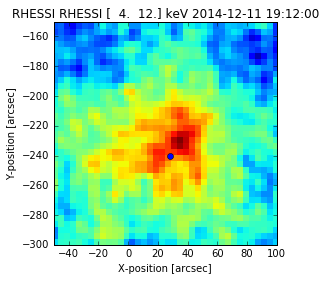

In [128]:
hsimap.plot()
plt.plot(cgx_arcsec.value,cgy_arcsec.value,'bo')
plt.xlim([-50,100])
plt.ylim([-300,-150])

In [13]:
offset_d0 = [cgx_arcsec.value - det0_center[0], cgy_arcsec.value-det0_center[1]]
offset_d1 = [cgx_arcsec.value - det1_center[0], cgy_arcsec.value-det1_center[1]]
offset_d4 = [cgx_arcsec.value - det4_center[0], cgy_arcsec.value-det4_center[1]]
offset_d5 = [cgx_arcsec.value - det5_center[0], cgy_arcsec.value-det5_center[1]]
offset_d6 = [cgx_arcsec.value - det6_center[0], cgy_arcsec.value-det6_center[1]]
print offset_d0
print offset_d1
print offset_d4
print offset_d5
print offset_d6

[398.21157323352134, -120.10831672229975]
[378.21157323352134, -120.10831672229975]
[388.21157323352134, -165.10831672229975]
[408.21157323352134, -150.10831672229975]
[393.21157323352134, -140.10831672229975]


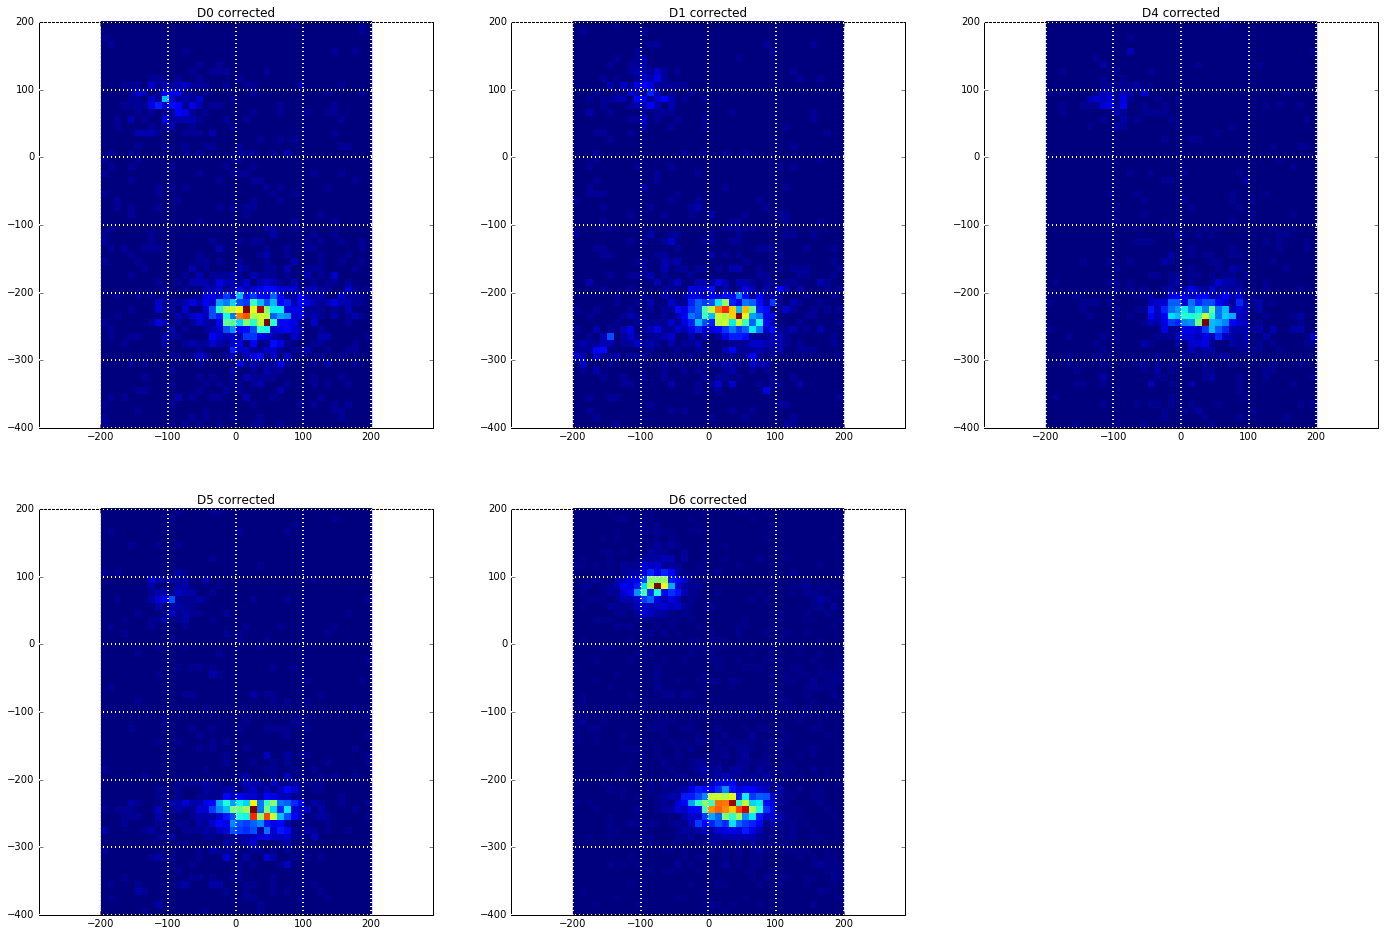

In [14]:
#test these pointing offsets
plt.figure(5,figsize=(24,16))


plt.subplot(2,3,1)
h=plt.hist2d(det0_good['hit_xy_solar_x']+offset_d0[0],det0_good['hit_xy_solar_y']+offset_d0[1],bins=[np.linspace(-200,200,41),np.linspace(-400,200,61)])
plt.axis('equal')
plt.grid(100,color='white',linewidth=2)
plt.title('D0 corrected')

plt.subplot(2,3,2)
h=plt.hist2d(det1_good['hit_xy_solar_x']+offset_d1[0],det1_good['hit_xy_solar_y']+offset_d1[1],bins=[np.linspace(-200,200,41),np.linspace(-400,200,61)])
plt.axis('equal')
plt.grid(100,color='white',linewidth=2)
plt.title('D1 corrected')

plt.subplot(2,3,3)
h=plt.hist2d(det4_good['hit_xy_solar_x']+offset_d4[0],det4_good['hit_xy_solar_y']+offset_d4[1],bins=[np.linspace(-200,200,41),np.linspace(-400,200,61)])
plt.axis('equal')
plt.grid(100,color='white',linewidth=2)
plt.title('D4 corrected')

plt.subplot(2,3,4)
h=plt.hist2d(det5_good['hit_xy_solar_x']+offset_d5[0],det5_good['hit_xy_solar_y']+offset_d5[1],bins=[np.linspace(-200,200,41),np.linspace(-400,200,61)])
plt.axis('equal')
plt.grid(100,color='white',linewidth=2)
plt.title('D5 corrected')

plt.subplot(2,3,5)
h=plt.hist2d(det6_good['hit_xy_solar_x']+offset_d6[0],det6_good['hit_xy_solar_y']+offset_d6[1],bins=[np.linspace(-200,200,41),np.linspace(-400,200,61)])
plt.axis('equal')
plt.grid(100,color='white',linewidth=2)
plt.title('D6 corrected')

In [178]:
#make a calibrated photon list for each detector, i.e. a pandas dataframe. Save these for future use.
det0_good['hit_xy_solar_x'].values

array([ -343.8387146 , -1122.6862793 ,  -786.05273438, ...,   887.81420898,
        1204.70629883,  1038.80615234], dtype=float32)

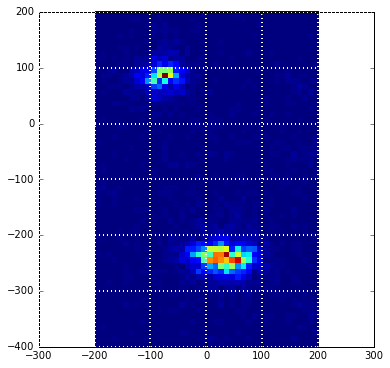

In [15]:
det0_calibrated = det0_good.copy()
det1_calibrated = det1_good.copy()
det4_calibrated = det4_good.copy()
det5_calibrated = det5_good.copy()
det6_calibrated = det6_good.copy()

for i in range(0,len(det0_good)):
    det0_calibrated['hit_xy_solar_x'].values[i] += offset_d0[0]
    det0_calibrated['hit_xy_solar_y'].values[i] += offset_d0[1]

for i in range(0,len(det1_good)):
    det1_calibrated['hit_xy_solar_x'].values[i] += offset_d1[0]
    det1_calibrated['hit_xy_solar_y'].values[i] += offset_d1[1]
    
for i in range(0,len(det4_good)):
    det4_calibrated['hit_xy_solar_x'].values[i] += offset_d4[0]
    det4_calibrated['hit_xy_solar_y'].values[i] += offset_d4[1]    

for i in range(0,len(det5_good)):
    det5_calibrated['hit_xy_solar_x'].values[i] += offset_d5[0]
    det5_calibrated['hit_xy_solar_y'].values[i] += offset_d5[1]

for i in range(0,len(det6_good)):
    det6_calibrated['hit_xy_solar_x'].values[i] += offset_d6[0]
    det6_calibrated['hit_xy_solar_y'].values[i] += offset_d6[1]


plt.figure(7,figsize=(6,6))
h=plt.hist2d(det6_calibrated['hit_xy_solar_x'],det6_calibrated['hit_xy_solar_y'],bins=[np.linspace(-200,200,41),np.linspace(-400,200,61)])
plt.axis('equal')
plt.grid(100,color='white',linewidth=2)

In [16]:
det0_calibrated.to_csv('det0_calibrated.csv')
det1_calibrated.to_csv('det1_calibrated.csv')
det4_calibrated.to_csv('det4_calibrated.csv')
det5_calibrated.to_csv('det5_calibrated.csv')
det6_calibrated.to_csv('det6_calibrated.csv')

In [45]:
import foxsi_objects
from foxsi_objects import Foxsi2PhotonList

In [46]:
foxsi_det0 = Foxsi2PhotonList('det0_calibrated.csv')
foxsi_det1 = Foxsi2PhotonList('det1_calibrated.csv')
foxsi_det4 = Foxsi2PhotonList('det4_calibrated.csv')
foxsi_det5 = Foxsi2PhotonList('det5_calibrated.csv')
foxsi_det6 = Foxsi2PhotonList('det6_calibrated.csv')

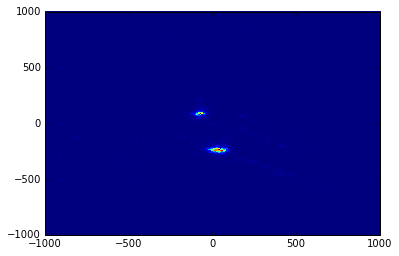

In [47]:
foxsi_map0 = foxsi_det0.get_image()
foxsi_map1 = foxsi_det1.get_image()
foxsi_map4 = foxsi_det4.get_image()
foxsi_map5 = foxsi_det5.get_image()
foxsi_map6 = foxsi_det6.get_image()



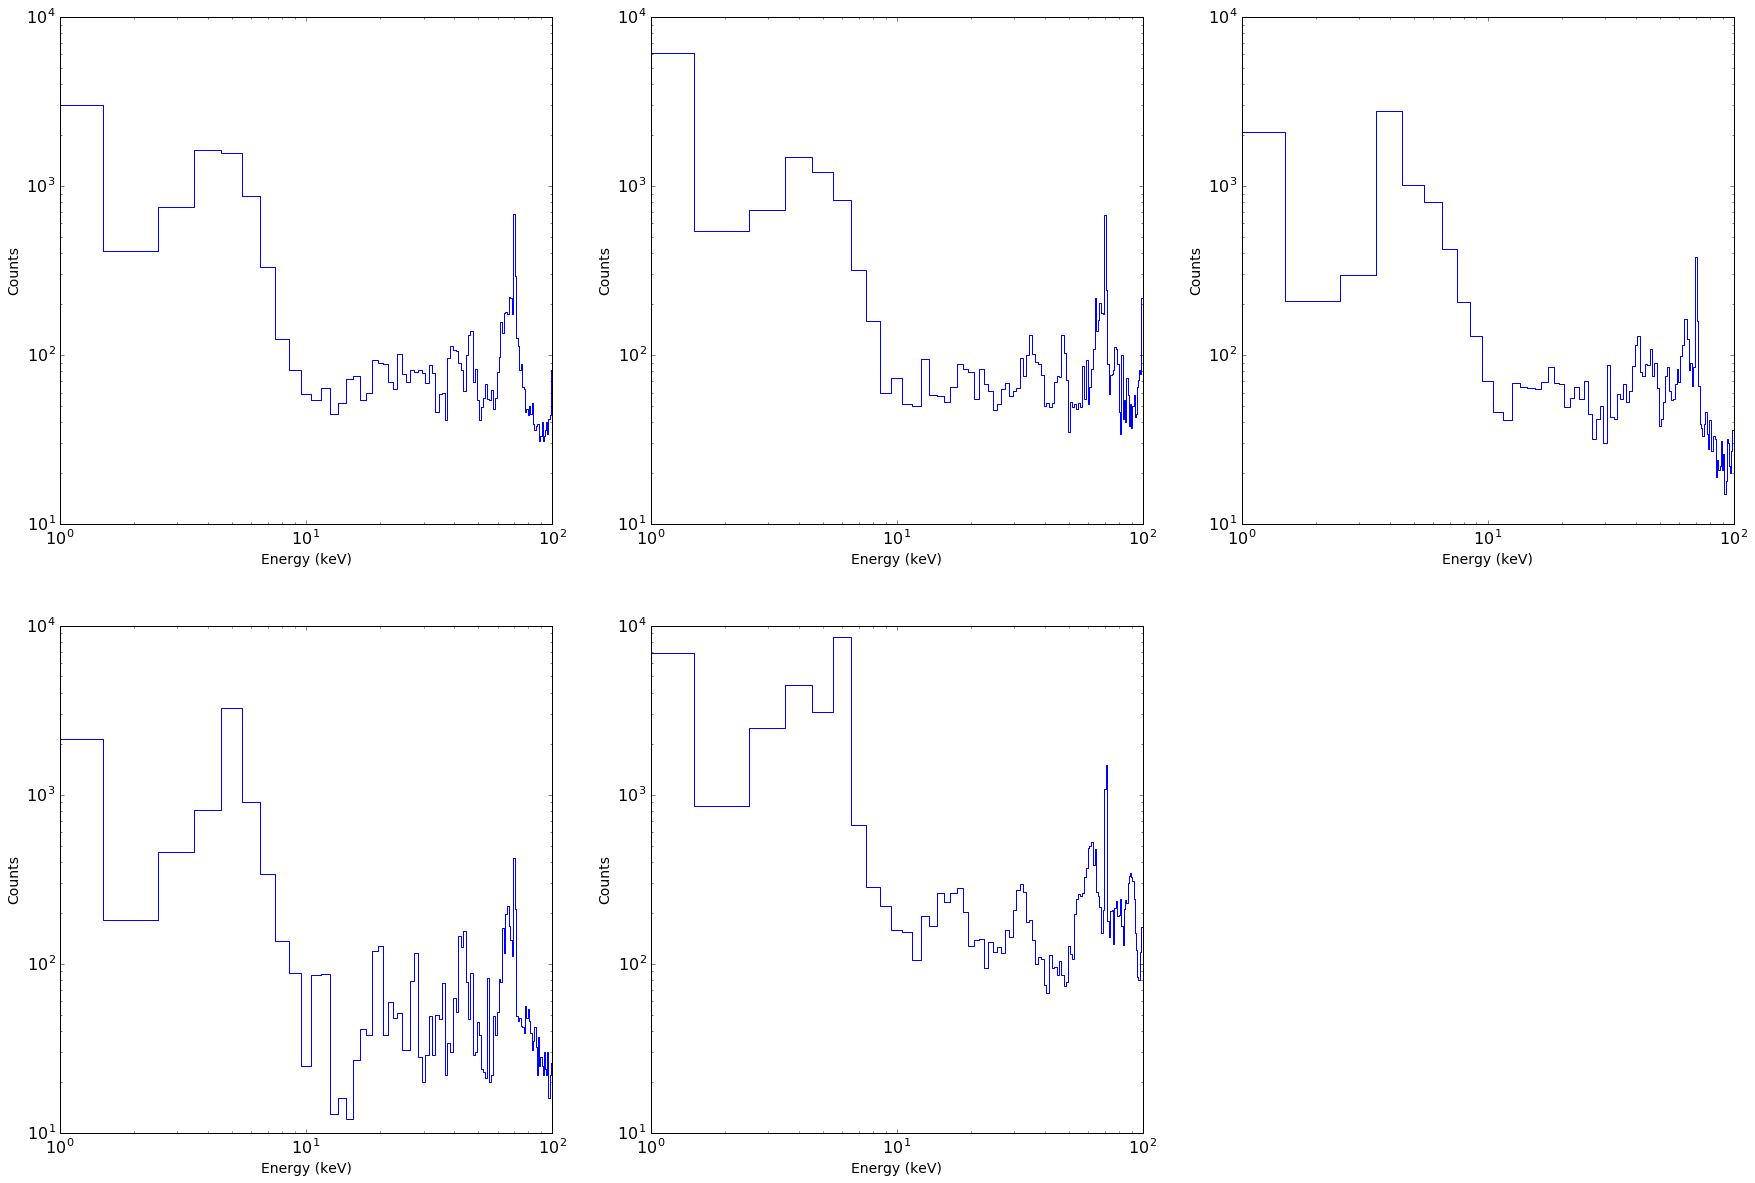

In [61]:
spec0 = foxsi_det0.get_spectrum()
spec1 = foxsi_det1.get_spectrum()
spec4 = foxsi_det4.get_spectrum()
spec5 = foxsi_det5.get_spectrum()
spec6 = foxsi_det6.get_spectrum()

plt.figure(10,figsize=(30,20))

plt.subplot(2,3,1)
plt.loglog(spec0.energies[0:-1],spec0.data,linestyle='steps-mid')
plt.xlabel('Energy (keV)',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tick_params(labelsize=16)

plt.subplot(2,3,2)
plt.loglog(spec1.energies[0:-1],spec1.data,linestyle='steps-mid')
plt.xlabel('Energy (keV)',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tick_params(labelsize=16)

plt.subplot(2,3,3)
plt.loglog(spec4.energies[0:-1],spec4.data,linestyle='steps-mid')
plt.xlabel('Energy (keV)',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tick_params(labelsize=16)

plt.subplot(2,3,4)
plt.loglog(spec5.energies[0:-1],spec5.data,linestyle='steps-mid')
plt.xlabel('Energy (keV)',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tick_params(labelsize=16)

plt.subplot(2,3,5)
plt.loglog(spec6.energies[0:-1],spec6.data,linestyle='steps-mid')
plt.xlabel('Energy (keV)',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tick_params(labelsize=16)

/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  passing values from FITS header or map attributes.
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  passing values from FITS header or map attributes.
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  passing values from FITS header or map attributes.
/Users/ainglis/python/sunpy/sunpy/map/mapbase.pyc:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
 

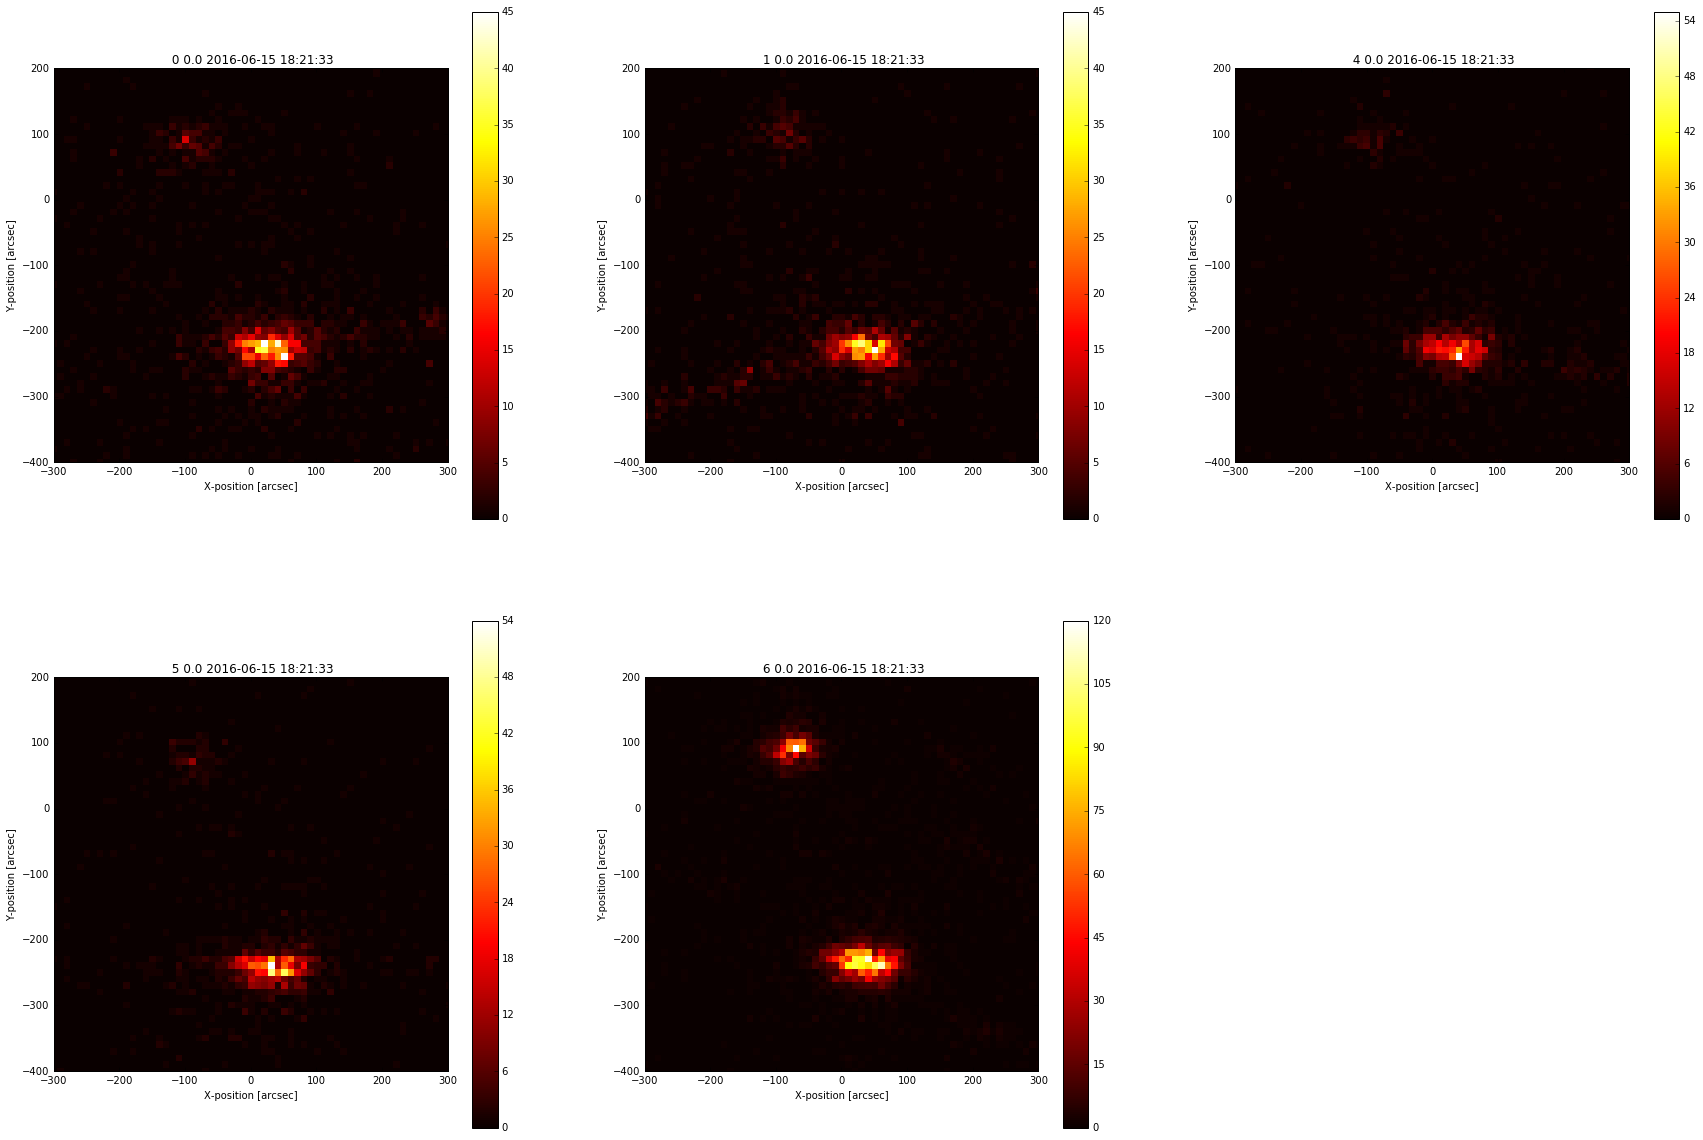

In [63]:
plt.figure(8,figsize=(30,20))

plt.subplot(2,3,1)
foxsi_map0.plot(cmap = 'hot')
#img.draw_grid(linewidth=2)
plt.ylim([-400,200])
plt.xlim([-300,300])
plt.colorbar()

plt.subplot(2,3,2)
foxsi_map1.plot(cmap = 'hot')
#img.draw_grid(linewidth=2)
plt.ylim([-400,200])
plt.xlim([-300,300])
plt.colorbar()

plt.subplot(2,3,3)
foxsi_map4.plot(cmap = 'hot')
#img.draw_grid(linewidth=2)
plt.ylim([-400,200])
plt.xlim([-300,300])
plt.colorbar()

plt.subplot(2,3,4)
foxsi_map5.plot(cmap = 'hot')
#img.draw_grid(linewidth=2)
plt.ylim([-400,200])
plt.xlim([-300,300])
plt.colorbar()

plt.subplot(2,3,5)
foxsi_map6.plot(cmap = 'hot')
#img.draw_grid(linewidth=2)
plt.ylim([-400,200])
plt.xlim([-300,300])
plt.colorbar()


In [64]:
aiamap = sunpy.map.Map('iris_foxsi_data/AIA20141211_191511_0171.fits')

In [65]:
plt.figure(9,figsize=(10,10))
compmap0 = sunpy.map.Map(aiamap,foxsi_map0,composite=True)
compmap1 = sunpy.map.Map(aiamap,foxsi_map1,composite=True)
compmap4 = sunpy.map.Map(aiamap,foxsi_map4,composite=True)
compmap5 = sunpy.map.Map(aiamap,foxsi_map5,composite=True)
compmap6 = sunpy.map.Map(aiamap,foxsi_map6,composite=True)

compmap_hsi = sunpy.map.Map(aiamap,hsimap,composite=True)

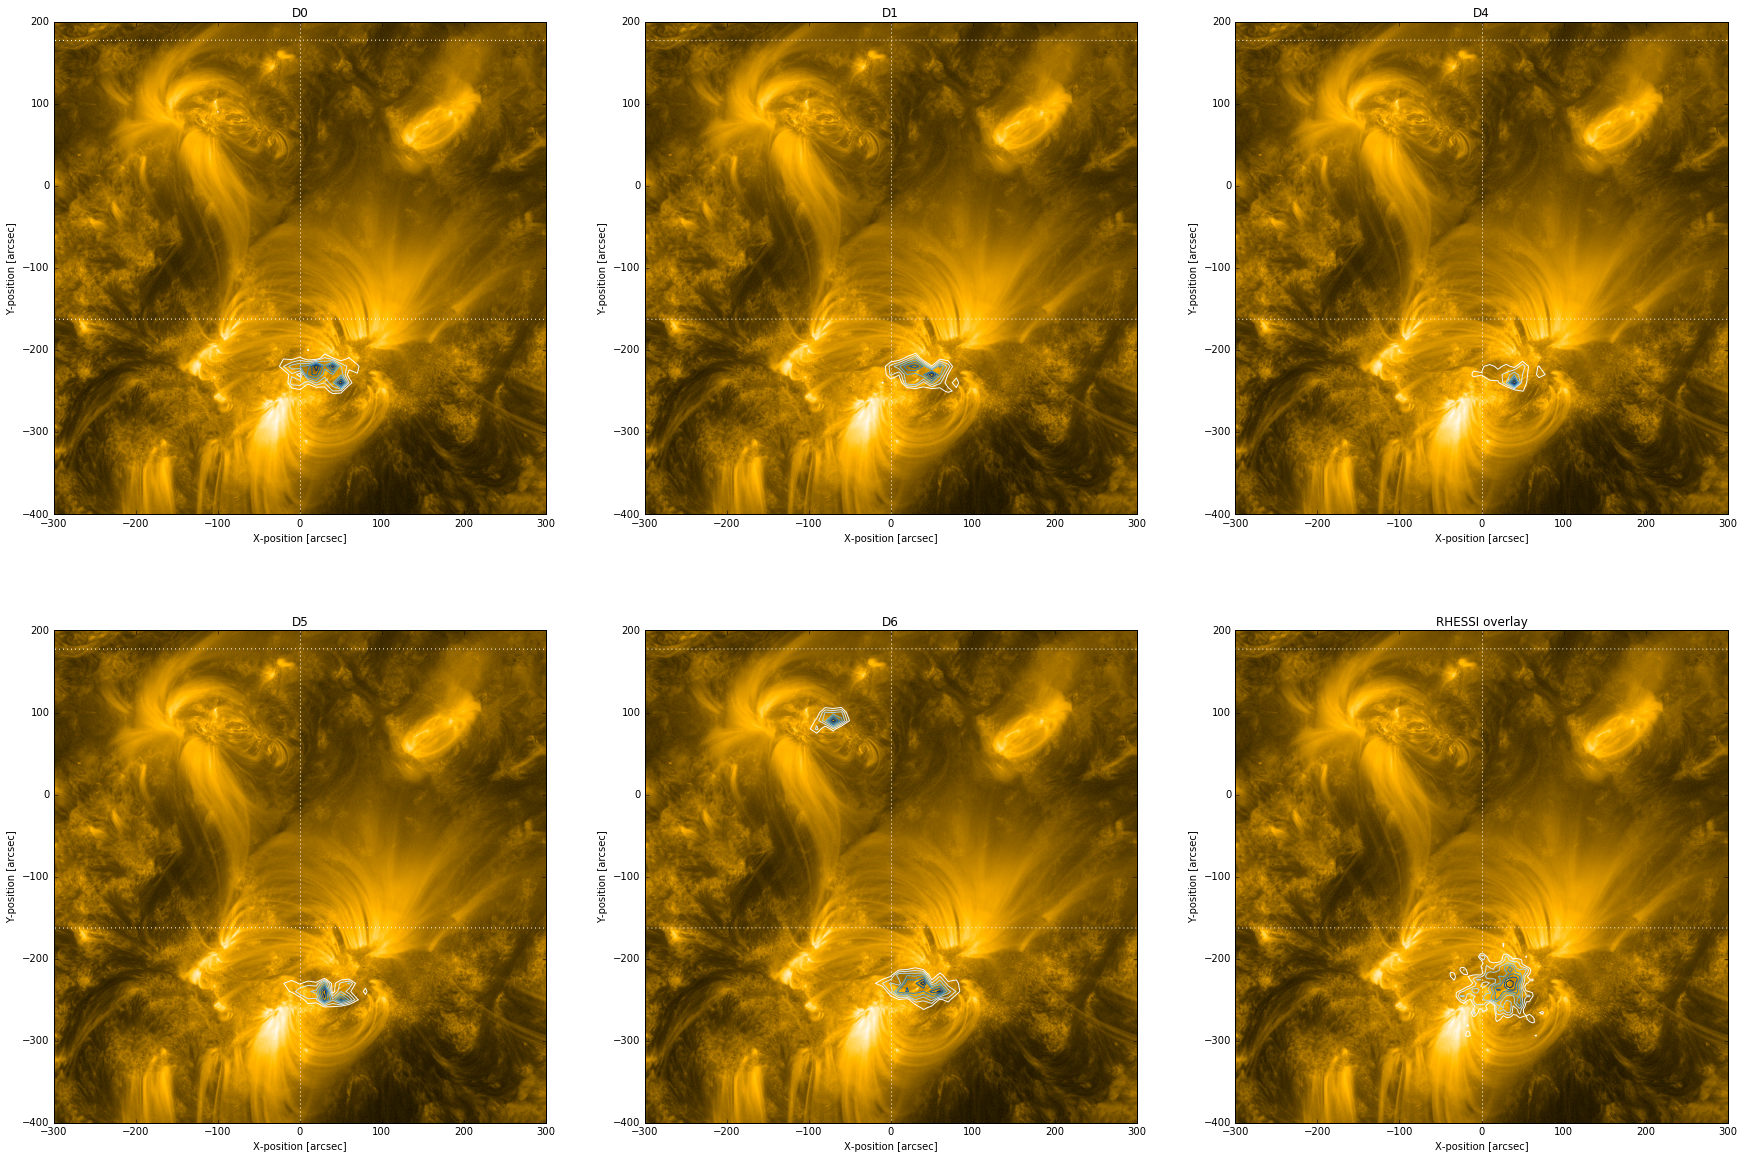

In [68]:
plt.figure(9,figsize=(30,20))

plt.subplot(2,3,1)
compmap0.set_levels(1,[30,40,50,60,70,80,90],percent=True)
compmap0.set_colors(1,'Blues')
compmap0.plot()
compmap6.draw_grid()
plt.xlim([-300,300])
plt.ylim([-400,200])
plt.title('D0')

plt.subplot(2,3,2)
compmap1.set_levels(1,[30,40,50,60,70,80,90],percent=True)
compmap1.set_colors(1,'Blues')
compmap1.plot()
compmap6.draw_grid()
plt.xlim([-300,300])
plt.ylim([-400,200])
plt.title('D1')

plt.subplot(2,3,3)
compmap4.set_levels(1,[30,40,50,60,70,80,90],percent=True)
compmap4.set_colors(1,'Blues')
compmap4.plot()
compmap6.draw_grid()
plt.xlim([-300,300])
plt.ylim([-400,200])
plt.title('D4')

plt.subplot(2,3,4)
compmap5.set_levels(1,[30,40,50,60,70,80,90],percent=True)
compmap5.set_colors(1,'Blues')
compmap5.plot()
compmap6.draw_grid()
plt.xlim([-300,300])
plt.ylim([-400,200])
plt.title('D5')

plt.subplot(2,3,5)
compmap6.set_levels(1,[30,40,50,60,70,80,90],percent=True)
compmap6.set_colors(1,'Blues')
compmap6.plot()
compmap6.draw_grid()
plt.xlim([-300,300])
plt.ylim([-400,200])
plt.title('D6')


plt.subplot(2,3,6)
compmap_hsi.set_levels(1,[30,40,50,60,70,80,90],percent=True)
compmap_hsi.set_colors(1,'Blues')
compmap_hsi.plot()
compmap_hsi.draw_grid()
plt.xlim([-300,300])
plt.ylim([-400,200])
plt.title('RHESSI overlay')